In [18]:
import numpy as np
import pandas as pd
import os, glob
import json 
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
filesDict = {i: pd.read_csv(f"./Capacity/PUB_GenOutputCapabilityMonth_{i}.csv") for i in range(202001, 202013)}

path = "./Capacity/"

all_files = glob.glob(os.path.join(path, "PUB_GenOutputCapabilityMonth_*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "merged.csv")



df_merged = df_merged.fillna(0)

df_merged = df_merged.replace("", 0)
df_merged = df_merged.replace(" ", 0)
df_merged = df_merged.replace("  ", 0)
df_merged = df_merged.replace("   ", 0)
df_merged = df_merged.replace("    ", 0)


df_merged["Delivery Date"] = pd.to_datetime(df_merged["Delivery Date"])

df_merged.to_csv( "merged.csv")

In [3]:
###---NUCLEAR---###
is_nuclear = df_merged['Fuel Type'] == 'NUCLEAR' 

df_nuclear = df_merged[is_nuclear]

is_output = df_nuclear['Measurement'] == 'Output' 

df_nuclear_output = df_nuclear[is_output]


for i in range(1, 25):
    df_nuclear_output[f"Hour {i}"] = pd.to_numeric(df_nuclear_output[f"Hour {i}"])



is_capability = df_nuclear['Measurement'] == 'Capability'

df_nuclear_capability = df_nuclear[is_capability]

for i in range(1, 25):
    df_nuclear_capability[f"Hour {i}"] = pd.to_numeric(df_nuclear_capability[f"Hour {i}"])

/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/483893784.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuclear_output[f"Hour {i}"] = pd.to_numeric(df_nuclear_output[f"Hour {i}"])
/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/483893784.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuclear_capability[f"Hour {i}"] = pd.to_numeric(df_nuclear_capability[f"Hour {i}"])


In [4]:
###---solar---###
is_solar = df_merged['Fuel Type'] == 'SOLAR' 

df_solar = df_merged[is_solar]

is_output = df_solar['Measurement'] == 'Output' 

df_solar_output = df_solar[is_output]


for i in range(1, 25):
    df_solar_output[f"Hour {i}"] = pd.to_numeric(df_solar_output[f"Hour {i}"])



is_capability = df_solar['Measurement'] == 'Available Capacity'

df_solar_capability = df_solar[is_capability]

for i in range(1, 25):
    df_solar_capability[f"Hour {i}"] = pd.to_numeric(df_solar_capability[f"Hour {i}"])

/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/2117369981.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solar_output[f"Hour {i}"] = pd.to_numeric(df_solar_output[f"Hour {i}"])
/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/2117369981.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solar_capability[f"Hour {i}"] = pd.to_numeric(df_solar_capability[f"Hour {i}"])


In [5]:
###---wind---###
is_wind = df_merged['Fuel Type'] == 'WIND'

df_wind = df_merged[is_wind]

is_output = df_wind['Measurement'] == 'Output' 

df_wind_output = df_wind[is_output]


for i in range(1, 25):
    df_wind_output[f"Hour {i}"] = pd.to_numeric(df_wind_output[f"Hour {i}"])


is_capability = df_wind['Measurement'] == 'Available Capacity'
df_wind_capability = df_wind[is_capability]

for i in range(1, 25):
    df_wind_capability[f"Hour {i}"] = pd.to_numeric(df_wind_capability[f"Hour {i}"])

/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/2424619507.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_output[f"Hour {i}"] = pd.to_numeric(df_wind_output[f"Hour {i}"])
/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/2424619507.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_capability[f"Hour {i}"] = pd.to_numeric(df_wind_capability[f"Hour {i}"])


In [6]:
### hydro
is_hydro = df_merged['Fuel Type'] == 'HYDRO' 

df_hydro = df_merged[is_hydro]

is_output = df_hydro['Measurement'] == 'Output' 

df_hydro_output = df_hydro[is_output]


for i in range(1, 25):
    df_hydro_output[f"Hour {i}"] = pd.to_numeric(df_hydro_output[f"Hour {i}"])



is_capability = df_hydro['Measurement'] == 'Capability'

df_hydro_capability = df_hydro[is_capability]

for i in range(1, 25):
    df_hydro_capability[f"Hour {i}"] = pd.to_numeric(df_hydro_capability[f"Hour {i}"])

/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/2217551729.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hydro_output[f"Hour {i}"] = pd.to_numeric(df_hydro_output[f"Hour {i}"])
/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/2217551729.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hydro_capability[f"Hour {i}"] = pd.to_numeric(df_hydro_capability[f"Hour {i}"])


In [7]:
###
temp = df_hydro_capability.drop("Generator", 1)
df_hydro_capability_g = temp.groupby([temp["Delivery Date"].dt.year, temp["Delivery Date"].dt.month, temp["Delivery Date"].dt.day]).sum()

hydro_capacity_factor_daily = {f"{i}": list(df_hydro_capability_g[i] / 8_918) for i in df_hydro_capability_g.columns}


temp = df_wind_output.drop("Generator", 1)
df_wind_output_daily = temp.groupby([temp["Delivery Date"].dt.year, temp["Delivery Date"].dt.month, temp["Delivery Date"].dt.day]).sum()

temp = df_wind_capability.drop("Generator", 1)
df_wind_capability_daily = temp.groupby([temp["Delivery Date"].dt.year, temp["Delivery Date"].dt.month, temp["Delivery Date"].dt.day]).sum()

wind_capacity_factor_daily = {f"{i}": list(df_wind_output_daily[i] / 4783) for i in df_wind_output_daily.columns}


temp = df_solar_output.drop("Generator", 1)
df_solar_output_daily = temp.groupby([temp["Delivery Date"].dt.year, temp["Delivery Date"].dt.month, temp["Delivery Date"].dt.day]).sum()

temp = df_solar_capability.drop("Generator", 1)
df_solar_capability_daily = temp.groupby([temp["Delivery Date"].dt.year, temp["Delivery Date"].dt.month, temp["Delivery Date"].dt.day]).sum()

solar_capacity_factor_daily = {f"{i}": list(df_solar_output_daily[i]/ 478) for i in df_solar_output_daily.columns}



temp = df_nuclear_output.drop("Generator", 1)
df_nuclear_output_daily = temp.groupby([temp["Delivery Date"].dt.year, temp["Delivery Date"].dt.month, temp["Delivery Date"].dt.day]).sum()

temp = df_nuclear_capability.drop("Generator", 1)
df_nuclear_capability_daily = temp.groupby([temp["Delivery Date"].dt.year, temp["Delivery Date"].dt.month, temp["Delivery Date"].dt.day]).sum()

nuclear_capacity_factor_daily = {f"{i}": list(df_nuclear_output_daily[i]/ 12111) for i in df_nuclear_output_daily.columns}




jsonFormatted = json.dumps(wind_capacity_factor_daily)
with open("wind_capacity_factor_daily.json", "w") as outfile:
    outfile.write(jsonFormatted)

jsonFormatted = json.dumps(solar_capacity_factor_daily)
with open("solar_capacity_factor_daily.json", "w") as outfile:
    outfile.write(jsonFormatted)

jsonFormatted = json.dumps(nuclear_capacity_factor_daily)
with open("nuclear_capacity_factor_daily.json", "w") as outfile:
    outfile.write(jsonFormatted)

/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/1961211067.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  temp = df_hydro_capability.drop("Generator", 1)
/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/1961211067.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  temp = df_wind_output.drop("Generator", 1)
/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/1961211067.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  temp = df_wind_capability.drop("Generator", 1)
/var/folders/p2/_rg1c7j16cn87kgrsk75v7ph0000gn/T/ipykernel_13682/1961211067.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

In [8]:
np.shape(df_wind_capability_daily['Hour 1'])

(366,)

In [13]:
wind_avg_capacity_factor = []
for col in wind_capacity_factor_daily.keys():
    wind_avg_capacity_factor.append(np.mean(wind_capacity_factor_daily[col]))

Text(0, 0.5, 'Capacity factor')

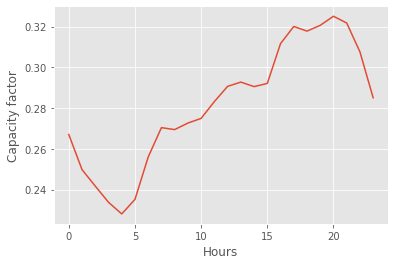

In [19]:
plt.plot(wind_avg_capacity_factor)
plt.xlabel("Hours")
plt.ylabel("Capacity factor")

In [20]:
solar_avg_capacity_factor = []
for col in solar_capacity_factor_daily.keys():
    solar_avg_capacity_factor.append(np.mean(solar_capacity_factor_daily[col]))

Text(0, 0.5, 'Capacity factor')

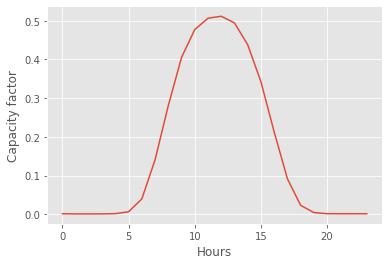

In [22]:
plt.plot(solar_avg_capacity_factor)
plt.xlabel("Hours")
plt.ylabel("Capacity factor")

In [23]:
nuclear_avg_capacity_factor = []
for col in nuclear_capacity_factor_daily.keys():
    nuclear_avg_capacity_factor.append(np.mean(nuclear_capacity_factor_daily[col]))

Text(0, 0.5, 'Capacity factor')

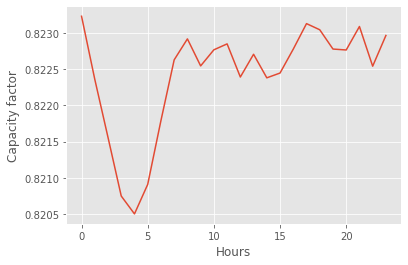

In [24]:
plt.plot(nuclear_avg_capacity_factor)
plt.xlabel("Hours")
plt.ylabel("Capacity factor")

In [ ]:
nuclear_capacity_factor_daily

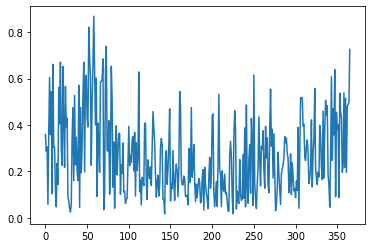

In [9]:
plt.plot(wind_capacity_factor_daily['Hour 1'])

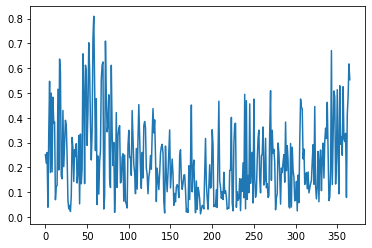

In [10]:
plt.plot(wind_capacity_factor_daily['Hour 5'])

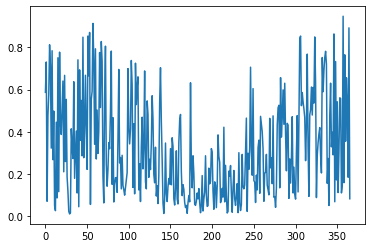

In [11]:
plt.plot(wind_capacity_factor_daily['Hour 20'])

(array([16., 14., 12., 11., 19., 12., 11., 18., 14., 18., 15., 15., 22.,
        20., 15., 16., 14., 13., 12., 19., 13., 18., 14., 11.,  4.]),
 array([0.01046025, 0.04552301, 0.08058577, 0.11564854, 0.1507113 ,
        0.18577406, 0.22083682, 0.25589958, 0.29096234, 0.3260251 ,
        0.36108787, 0.39615063, 0.43121339, 0.46627615, 0.50133891,
        0.53640167, 0.57146444, 0.6065272 , 0.64158996, 0.67665272,
        0.71171548, 0.74677824, 0.781841  , 0.81690377, 0.85196653,
        0.88702929]),
 <BarContainer object of 25 artists>)

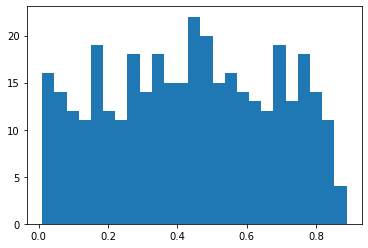

In [12]:
plt.hist(solar_capacity_factor_daily['Hour 15'],25)

In [13]:
#Nuclear
nuclearDailyData = dict()
for i in range(1,367):
    nuclearDailyData[i] = []
    for j in range(1,25):
        nuclearDailyData[i].append(nuclear_capacity_factor_daily[f"Hour {j}"][i-1])

In [14]:
#Hydro
hydroDailyData = dict()
for i in range(1,367):
    hydroDailyData[i] = []
    for j in range(1,25):
        hydroDailyData[i].append(hydro_capacity_factor_daily[f"Hour {j}"][i-1])

In [15]:
#Solar
solarDailyData = dict()
for i in range(1,367):
    solarDailyData[i] = []
    for j in range(1,25):
        solarDailyData[i].append(solar_capacity_factor_daily[f"Hour {j}"][i-1])

In [16]:
#Wind
windDailyData = dict()
for i in range(1,367):
    windDailyData[i] = []
    for j in range(1,25):
        windDailyData[i].append(wind_capacity_factor_daily[f"Hour {j}"][i-1])


In [17]:
jsonFormatted = json.dumps(nuclearDailyData)
with open("nuclearDailyData.json", "w") as outfile:
    outfile.write(jsonFormatted)

jsonFormatted = json.dumps(hydroDailyData)
with open("hydroDailyData.json", "w") as outfile:
    outfile.write(jsonFormatted)

jsonFormatted = json.dumps(windDailyData)
with open("windDailyData.json", "w") as outfile:
    outfile.write(jsonFormatted)

jsonFormatted = json.dumps(solarDailyData)
with open("solarDailyData.json", "w") as outfile:
    outfile.write(jsonFormatted)